In [11]:
# libraries
import matplotlib.pyplot as plt
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [12]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# problema librerie che usano OpenMP, due versioni di OpenMP sono caricate nello stesso processo, ad esempio da PyTorch e da NumPy 

In [13]:
base_dir = os.getcwd()

In [14]:
dataset_path = os.path.join(base_dir, 'data_images')

In [ ]:
# Trasformazioni
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # o altra dimensione adatta
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # normalizzazione standard RGB
])

# trasformiamo l'immagine in un tensore, normalizziamo a uno standard (valutare) e ridimensioniamo(valutare)

In [ ]:
# Dataset
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, "train"), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, "valid"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, "test"), transform=transform)

# definiamo i dataset e applichiamo la funzione trasform

In [22]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classi
print("Classi:", train_dataset.classes)

#tramite dataloader andiamo a estrarre le classi del nostro dataset


Classi: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:
pretty_classes = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
# nomi classi troppo lunghi e poco intuitivi, ridefiniamo

# Data Visualization

In [19]:
def show_batch(loader, classes):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 8))
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # denormalize
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

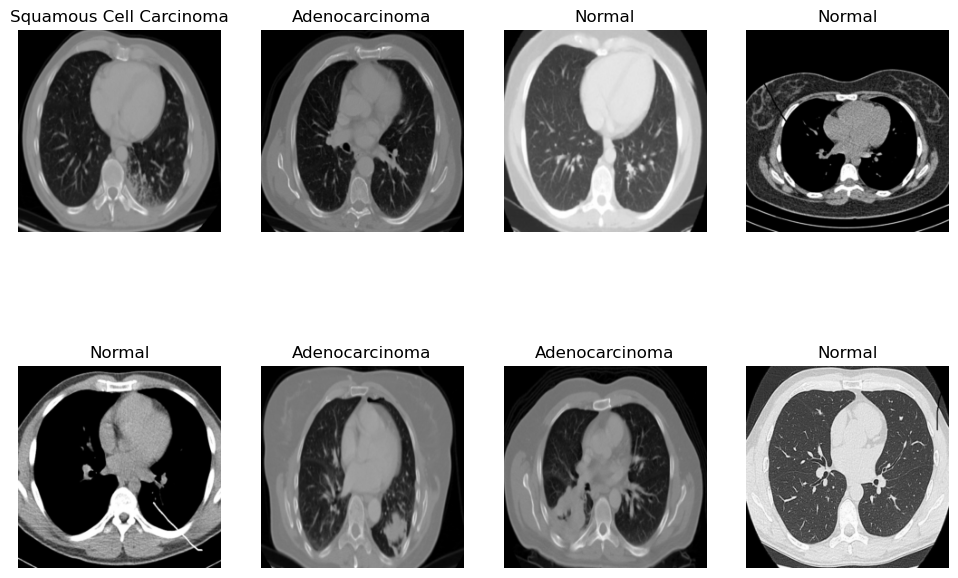

In [20]:
show_batch(train_loader, pretty_classes)